In [144]:
import pandas as pd
from pandas import DataFrame
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [145]:
data=pd.read_csv("train.tsv",delimiter="\t")

In [146]:
data.head()

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,0,29.0,4,135.0,84.00,2525.0,16.0,82,1,dodge aries se
1,3,31.9,4,89.0,71.00,1925.0,14.0,79,2,vw rabbit custom
2,9,19.0,6,156.0,108.0,2930.0,15.5,76,3,toyota mark ii
3,11,28.0,4,90.0,75.00,2125.0,14.5,74,1,dodge colt
4,13,37.7,4,89.0,62.00,2050.0,17.3,81,3,toyota tercel


In [147]:
origin_data = pd.get_dummies(data['origin'])
origin_data.columns = ['German','American','Japanese']
data = data.drop(['origin'],axis = 1)
data = data.drop(['car name'],axis = 1)
data.head()

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,0,29.0,4,135.0,84.00,2525.0,16.0,82
1,3,31.9,4,89.0,71.00,1925.0,14.0,79
2,9,19.0,6,156.0,108.0,2930.0,15.5,76
3,11,28.0,4,90.0,75.00,2125.0,14.5,74
4,13,37.7,4,89.0,62.00,2050.0,17.3,81


In [148]:
data = pd.concat([data,origin_data], axis=1)
data.head()

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,German,American,Japanese
0,0,29.0,4,135.0,84.00,2525.0,16.0,82,1,0,0
1,3,31.9,4,89.0,71.00,1925.0,14.0,79,0,1,0
2,9,19.0,6,156.0,108.0,2930.0,15.5,76,0,0,1
3,11,28.0,4,90.0,75.00,2125.0,14.5,74,1,0,0
4,13,37.7,4,89.0,62.00,2050.0,17.3,81,0,0,1


In [149]:
american = data[data["American"] == 1]
#american.count()

In [150]:
german = data[data["German"] == 1]
german.count()

id              122
mpg             122
cylinders       122
displacement    122
horsepower      122
weight          122
acceleration    122
model year      122
German          122
American        122
Japanese        122
dtype: int64

In [151]:
japanese = data[data["Japanese"] == 1]


In [152]:
X = pd.DataFrame()
X['cylinders'] = american['cylinders']
X['displacement'] = american['displacement']
X['weight'] = american['weight']
X['model year'] = american['model year']
Y = american['mpg']

In [153]:
#平均二乗誤差
def rmse(y,pred):
    total = 0
    for i in range(len(y)):
        total += (pred[i] - y[i])**2        
        
    total /= len(y) 
    total = total**0.5 
    
    return total

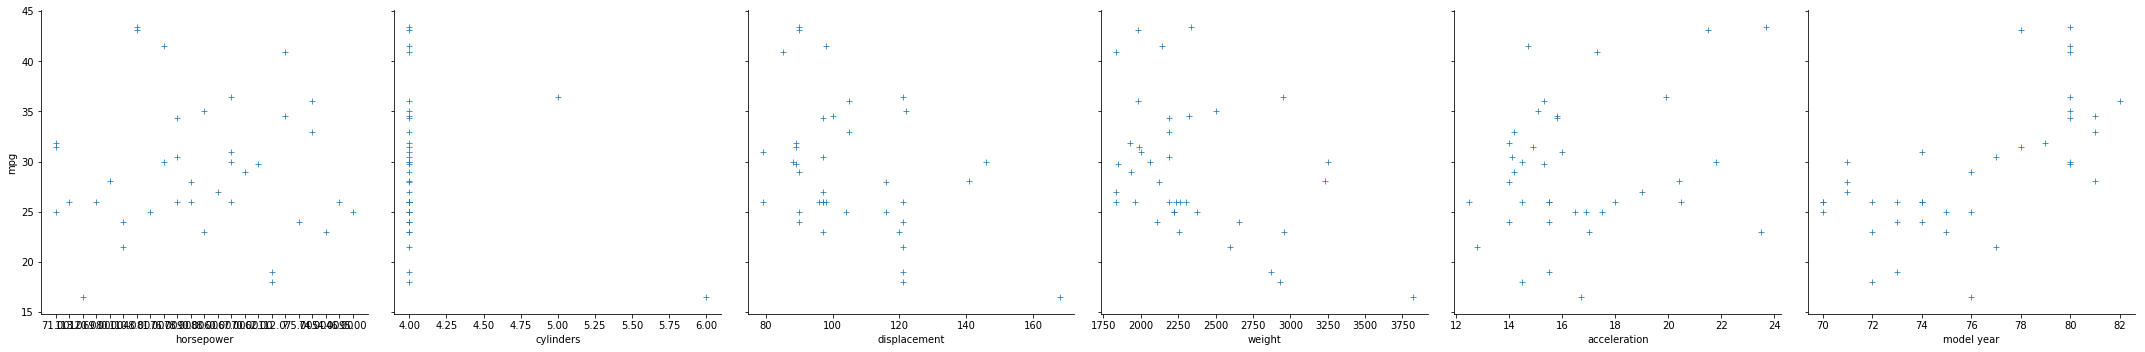

In [154]:
sns.pairplot(american , height=5, markers="+", x_vars=["horsepower", "cylinders", "displacement", "weight", "acceleration", "model year"], y_vars=["mpg"])


In [155]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size=0.2)

In [156]:
liear_regression = LinearRegression()
linear_regression.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [157]:
#prediction for ameerican
result = pd.DataFrame()
result= linear_regression.predict(test_x)

print(linear_regression.score(test_x,test_y))
evaluation = rmse(test_y,result)
print(evaluation)
print(result)

0.2639055530798934


KeyError: 0

In [ ]:
#prediction for german
X = pd.DataFrame()
X['cylinders'] = german['cylinders']
X['displacement'] = german['displacement']
X['weight'] = german['weight']
X['model year'] = german['model year']
Y = german['mpg']
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size=0.2)
liear_regression = LinearRegression()
linear_regression.fit(train_x,train_y)
result = linear_regression.predict(test_x)
print(linear_regression.score(test_x,test_y))

In [ ]:
#prediction for japanese
X = pd.DataFrame()
X['cylinders'] = japanese['cylinders']
X['displacement'] = japanese['displacement']
X['weight'] = japanese['weight']
X['model year'] = japanese['model year']
Y = japanese['mpg']
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size=0.2)
liear_regression = LinearRegression()
linear_regression.fit(train_x,train_y)
result = linear_regression.predict(test_x)
print(linear_regression.score(test_x,test_y))

In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10)
#データ分割  cross validation（交差検証）
r_list = []
for train_index, test_index in kf.split(train_x):
    train_x_itr, test_x_itr = train_x[train_index], train_x[test_index]
    train_y_itr, test_y_itr = train_y[train_index], train_y[test_index]
    linear_regression = LinearRegression()
    linear_regression.fit(train_x_itr,train_y_itr)  
    result = linear_regression.predict(test_x_itr)
    r_list.append(rmse(test_y_itr,result))
    
print(r_list)
print(np.mean(r_list))

In [ ]:
testFrame[['id', 'mpg']].to_csv('./submit.csv', header=False, index=False)